In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from src.metrics import *
from src.models import * 
from src.concept_vectors import *
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import seaborn as sns
import json 
import pickle 

2023-10-02 23:26:02.366131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 23:26:05.118405: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-02 23:26:05.740276: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/njr61/rds/hpc-work/anaconda3/lib
2023-10-02 23:26:05.740888: I tensorflow/com

## Evaluation

### Qualitative Evaluation

#### MNIST

In [13]:
dataset = MNIST_Dataset()
attributes = dataset.get_attributes()

In [14]:
mnist_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_labels)

      ---- spurious
 ----|
                ---- 1_color
           ----|
                ---- 1_number

      ----|
                     ---- 7_color
                ----|
                     ---- 7_number

           ----|
                          ---- 3_color
                     ----|
                          ---- 3_number

                ----|
                               ---- 2_color
                          ----|
                               ---- 2_number

                     ----|
                                    ---- 9_color
                               ----|
                                    ---- 9_number

                          ----|
                                         ---- 0_color
                                    ----|
                                         ---- 0_number

                               ----|
                                              ---- 6_color
                                         ----|
                                 

In [16]:
mnist_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_shapley)

           ---- 1_color
      ----|
           ---- 1_number

 ----|
                ---- 8_color
           ----|
                ---- 8_number

      ----|
                     ---- 0_color
                ----|
                     ---- 0_number

           ----|
                          ---- 6_color
                     ----|
                          ---- 6_number

                ----|
                               ---- 9_color
                          ----|
                               ---- 9_number

                     ----|
                                    ---- 4_color
                               ----|
                                    ---- 4_number

                          ----|
                                         ---- 5_color
                                    ----|
                                         ---- 5_number

                               ----|
                                              ---- 7_color
                                      

In [17]:
mnist_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_tcav)

0_color


Exception: No CAVs found at ./results/cavs/mnist/43

In [18]:
mnist_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_cem)

                ---- 1_color
           ----|
                ---- 1_number

      ----|
                ---- 5_color
           ----|
                ---- 5_number


 ----|
                     ---- 8_color
                ----|
                     ---- 8_number

           ----|
                     ---- 9_color
                ----|
                     ---- 9_number


      ----|
                     ---- 0_color
                ----|
                     ---- 0_number

           ----|
                               ---- 7_color
                          ----|
                               ---- 7_number

                     ----|
                               ---- 2_color
                          ----|
                               ---- 2_number


                ----|
                               ---- 4_color
                          ----|
                               ---- 4_number

                     ----|
                                    ---- 6_color
           

In [19]:
mnist_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_concept2vec)

           ---- 1_color
      ----|
           ---- 1_number

 ----|
                ---- 7_color
           ----|
                ---- 7_number

      ----|
                     ---- 4_color
                ----|
                     ---- 4_number

           ----|
                                    ---- 3_color
                               ----|
                                    ---- 3_number

                          ----|
                                         ---- 8_color
                                    ----|
                                         ---- 8_number

                               ----|
                                         ---- spurious
                                    ----|
                                              ---- 2_color
                                         ----|
                                              ---- 2_number




                     ----|
                                    ---- 6_color
                               -

#### CUB

In [20]:
dataset = CUB_Dataset()
attributes = dataset.get_attributes()

In [21]:
cub_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_labels)

                     ---- has_throat_color::white
                ----|
                          ---- has_breast_color::white
                     ----|
                               ---- has_underparts_color::white
                          ----|
                               ---- has_belly_color::white



           ----|
                               ---- has_upper_tail_color::grey
                          ----|
                               ---- has_under_tail_color::grey

                     ----|
                               ---- has_wing_color::grey
                          ----|
                                    ---- has_primary_color::grey
                               ----|
                                         ---- has_upperparts_color::grey
                                    ----|
                                         ---- has_back_color::grey




                ----|
                          ---- has_bill_length::about_the_same_as_head
               

In [22]:
cub_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_shapley)

                          ---- has_upper_tail_color::buff
                     ----|
                          ---- has_under_tail_color::buff

                ----|
                               ---- has_upperparts_color::buff
                          ----|
                                    ---- has_wing_color::buff
                               ----|
                                    ---- has_back_color::buff


                     ----|
                               ---- has_nape_color::buff
                          ----|
                               ---- has_primary_color::buff



           ----|
                     ---- has_throat_color::buff
                ----|
                          ---- has_breast_color::buff
                     ----|
                               ---- has_underparts_color::buff
                          ----|
                               ---- has_belly_color::buff




      ----|
                     ---- has_belly_color::brown
          

In [23]:
cub_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_tcav)

has_bill_shape::dagger


Exception: No CAVs found at ./results/cavs/cub/43

In [ ]:
cub_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_cem)

                ---- has_belly_color::grey
           ----|
                     ---- has_upperparts_color::yellow
                ----|
                          ---- has_underparts_color::yellow
                     ----|
                          ---- has_upper_tail_color::white



      ----|
                ---- has_back_color::yellow
           ----|
                          ---- has_wing_pattern::striped
                     ----|
                               ---- has_primary_color::yellow
                          ----|
                                         ---- has_forehead_color::white
                                    ----|
                                              ---- has_wing_pattern::multi-colored
                                         ----|
                                                   ---- has_primary_color::brown
                                              ----|
                                                        ---- has_back_color::white
   

In [ ]:
cub_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_concept2vec)

                          ---- has_wing_color::brown
                     ----|
                               ---- has_upperparts_color::brown
                          ----|
                               ---- has_primary_color::brown


                ----|
                          ---- has_upper_tail_color::brown
                     ----|
                          ---- has_forehead_color::brown


           ----|
                     ---- has_wing_color::buff
                ----|
                          ---- has_back_color::brown
                     ----|
                               ---- has_under_tail_color::brown
                          ----|
                               ---- has_crown_color::brown




      ----|
                     ---- has_underparts_color::brown
                ----|
                     ---- has_breast_color::brown

           ----|
                               ---- has_breast_color::buff
                          ----|
                      

#### DSprites

In [ ]:
dataset = DSprites_Dataset()
attributes = dataset.get_attributes()

In [ ]:
dsprites_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(dsprites_hierarchy_shapley)

           ---- is_scale_0.7
      ----|
                ---- is_scale_0.5
           ----|
                     ---- is_orientation_90
                ----|
                     ---- is_y_0



 ----|
                ---- is_scale_0.6
           ----|
                ---- is_orientation_0

      ----|
                     ---- is_ellipse
                ----|
                          ---- is_scale_1
                     ----|
                          ---- is_x_16


           ----|
                          ---- is_heart
                     ----|
                          ---- is_orientation_180

                ----|
                               ---- is_square
                          ----|
                                    ---- is_x_0
                               ----|
                                         ---- is_white
                                    ----|
                                         ---- is_scale_0.9



                     ----|
                      

In [ ]:
valid_attributes = set([''.join([str(i) for i in a['attribute_label']]) for a in dataset.get_data()])
valid_attributes = list(valid_attributes)
valid_attributes = [[int(i) for i in a] for a in valid_attributes]
valid_attributes = [[attributes[j] for j in range(len(a)) if a[j] == 1] for a in valid_attributes]
valid_attributes

[['is_white',
  'is_square',
  'is_scale_0.8',
  'is_orientation_270',
  'is_x_0',
  'is_y_16'],
 ['is_white',
  'is_square',
  'is_scale_0.6',
  'is_orientation_270',
  'is_x_16',
  'is_y_16'],
 ['is_white',
  'is_square',
  'is_scale_0.5',
  'is_orientation_90',
  'is_x_0',
  'is_y_0'],
 ['is_white',
  'is_square',
  'is_scale_0.7',
  'is_orientation_90',
  'is_x_16',
  'is_y_0'],
 ['is_white',
  'is_square',
  'is_scale_0.8',
  'is_orientation_270',
  'is_x_16',
  'is_y_16'],
 ['is_white',
  'is_ellipse',
  'is_scale_1',
  'is_orientation_180',
  'is_x_16',
  'is_y_16'],
 ['is_white',
  'is_heart',
  'is_scale_1',
  'is_orientation_180',
  'is_x_0',
  'is_y_16'],
 ['is_white',
  'is_heart',
  'is_scale_0.6',
  'is_orientation_180',
  'is_x_0',
  'is_y_16'],
 ['is_white',
  'is_heart',
  'is_scale_0.6',
  'is_orientation_0',
  'is_x_0',
  'is_y_0'],
 ['is_white',
  'is_heart',
  'is_scale_0.8',
  'is_orientation_180',
  'is_x_16',
  'is_y_0']]

#### CheXpert

In [4]:
dataset = Chexpert_Dataset()
attributes = dataset.get_attributes()

In [5]:
chexpert_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_shapley)

      ---- Support Devices
 ----|
           ---- Lung Lesion
      ----|
                               ---- Lung Opacity
                          ----|
                                    ---- Consolidation
                               ----|
                                    ---- Fracture


                     ----|
                               ---- Enlarged Cardiom
                          ----|
                               ---- Pneumothroax


                ----|
                          ---- Pneumonia
                     ----|
                          ---- Pleural Other


           ----|
                     ---- Pleural Effusion
                ----|
                          ---- Edema
                     ----|
                               ---- Cardiomegaly
                          ----|
                               ---- Atelectasis


In [6]:
chexpert_hierarchy_label = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_label)

           ---- Edema
      ----|
                ---- Atelectasis
           ----|
                     ---- Cardiomegaly
                ----|
                          ---- Enlarged Cardiom
                     ----|
                                    ---- Lung Opacity
                               ----|
                                         ---- Consolidation
                                    ----|
                                              ---- Pneumonia
                                         ----|
                                              ---- Pleural Other



                          ----|
                                    ---- Pneumothroax
                               ----|
                                    ---- Fracture






 ----|
           ---- Support Devices
      ----|
                ---- Lung Lesion
           ----|
                ---- Pleural Effusion


### Quantitative Evaluation

### Generate Tables

In [26]:
dataset_name = 'cub'
methods = ['shapley','label','cem','concept2vec']
nice_names = ['Shapley','Label','CEM','Concept2Vec']

In [27]:
cub_dict = {}
dataset_name = 'cub'
for m,m_nice in zip(methods,nice_names):
    cub_dict[m_nice] = {}
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        cub_dict[m_nice][name] = value
    

In [28]:
dsprites_dict = {}
dataset_name = 'dsprites'
for m,m_nice in zip(methods,nice_names):
    dsprites_dict[m_nice] = {}
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        dsprites_dict[m_nice][name] = value
    

In [41]:
mnist_dict = {}
dataset_name = 'mnist'
for m,m_nice in zip(methods,nice_names):
    mnist_dict[m_nice] = {}
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        mnist_dict[m_nice][name] = value
    

In [42]:
chexpert_dict = {}
dataset_name = 'chexpert'
for m,m_nice in zip(methods,nice_names):
    chexpert_dict[m_nice] = {}
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        chexpert_dict[m_nice][name] = value
    

In [39]:
columns = ['truthfulness','robustness','stability']
for m in nice_names:
    values_cub = [cub_dict[m][c] for c in columns]
    values_dsprites = [dsprites_dict[m][c] for c in columns]
    values_cub[1] = (1-values_cub[1][0],values_cub[1][1])
    values_dsprites[1] = (1-values_dsprites[1][0],values_dsprites[1][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for i in values_cub:
        other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    for i in values_dsprites:
        other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"
    print(s)


Shapley & 0.75 $\pm$ 0.00 & 0.61 $\pm$ 0.04 & 0.00 $\pm$ 0.00 & 0.44 $\pm$ 0.00 & 0.61 $\pm$ 0.02 & 0.05 $\pm$ 0.01 \\
Label & 0.73 $\pm$ 0.00 & 0.97 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.50 $\pm$ 0.00 & 0.19 $\pm$ 0.00 & 0.00 $\pm$ 0.00 \\
CEM & 0.05 $\pm$ 0.00 & 0.02 $\pm$ 0.01 & 0.97 $\pm$ 0.00 & 0.27 $\pm$ 0.01 & 0.24 $\pm$ 0.16 & 0.29 $\pm$ 0.03 \\
Concept2Vec & 0.41 $\pm$ 0.01 & 0.31 $\pm$ 0.02 & 0.71 $\pm$ 0.02 & 0.31 $\pm$ 0.03 & 0.12 $\pm$ 0.04 & 0.17 $\pm$ 0.03 \\


In [43]:
columns = ['truthfulness','robustness','stability']
for m in nice_names:
    values_chexpert = [chexpert_dict[m][c] for c in columns]
    values_mnist = [mnist_dict[m][c] for c in columns]
    values_chexpert[1] = (1-values_chexpert[1][0],values_chexpert[1][1])
    values_mnist[1] = (1-values_mnist[1][0],values_mnist[1][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for i in values_chexpert:
        other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    for i in values_mnist:
        other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"
    print(s)

Shapley & 0.47 $\pm$ 0.03 & 0.37 $\pm$ 0.03 & 0.03 $\pm$ 0.02 & 0.95 $\pm$ 0.00 & 0.95 $\pm$ 0.00 & 0.03 $\pm$ 0.02 \\
Label & 0.51 $\pm$ 0.00 & 0.92 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.95 $\pm$ 0.00 & 0.95 $\pm$ 0.00 & 0.00 $\pm$ 0.00 \\
CEM & 0.42 $\pm$ 0.04 & 0.50 $\pm$ 0.12 & 0.56 $\pm$ 0.07 & 0.83 $\pm$ 0.18 & 0.71 $\pm$ 0.10 & 0.25 $\pm$ 0.15 \\
Concept2Vec & 0.41 $\pm$ 0.06 & 0.64 $\pm$ 0.08 & 0.57 $\pm$ 0.05 & 0.95 $\pm$ 0.00 & 0.95 $\pm$ 0.00 & 0.05 $\pm$ 0.00 \\


#### MNIST

In [31]:
dataset_name = 'mnist'
methods = ['shapley','cem','tcav','label','concept2vec']

In [32]:
for m in methods:
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    print("=== {} ===".format(m))
    
    print(open(file_name).read())

=== shapley ===
Stability: (0.03174603174603178, 0.022447834323382487)
Image Robustness: (0.04761904761904767, 0.0)
Image Responsiveness: (0.04761904761904767, 0.0)
Truthfulness: (0.9523809523809522, 1.1102230246251565e-16)

=== cem ===
Stability: (0.253968253968254, 0.14720029357929687)
Image Robustness: (0.28571428571428575, 0.10286889997472791)
Image Responsiveness: (0.9523809523809524, 0.06734350297014735)
Truthfulness: (0.8253968253968255, 0.17958267458705968)

=== tcav ===
Stability: (0.03174603174603178, 0.022447834323382487)
Image Robustness: (0.9047619047619048, 0.0)
Image Responsiveness: (1.0, 0.0)
Truthfulness: (0.9523809523809522, 1.1102230246251565e-16)

=== label ===
Stability: (0.0, 0.0)
Image Robustness: (0.04761904761904767, 0.0)
Image Responsiveness: (1.0, 0.0)
Truthfulness: (0.9523809523809522, 1.1102230246251565e-16)

=== concept2vec ===
Stability: (0.04761904761904767, 0.0)
Image Robustness: (0.04761904761904767, 0.0)
Image Responsiveness: (0.9682539682539683, 0.02

#### CUB

In [30]:
dataset_name = 'cub'
methods = ['shapley','label','cem','concept2vec','tcav']

In [31]:
for m in methods:
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    print("=== {} ===".format(m))
    
    print(open(file_name).read())

=== shapley ===
Stability: (0.003968253968253954, 0.0028059792904227975)
Image Robustness: (0.38591269841269843, 0.040975945293776544)
Image Responsiveness: (0.373015873015873, 0.008534052844288289)
Truthfulness: (0.7541666666666668, 0.0022271770159369014)

=== label ===
Stability: (0.0, 0.0)
Image Robustness: (0.0267857142857143, 0.0)
Image Responsiveness: (0.9672619047619048, 0.0)
Truthfulness: (0.7303571428571428, 0.0)

=== cem ===
Stability: (0.9722222222222222, 0.0037119616932281036)
Image Robustness: (0.9751984126984127, 0.01148396518133952)
Image Responsiveness: (0.9771825396825397, 0.008534052844288337)
Truthfulness: (0.05476190476190477, 0.0030351306628528447)

=== concept2vec ===
Stability: (0.7083333333333334, 0.015934899210524805)
Image Robustness: (0.6865079365079364, 0.018559808466140564)
Image Responsiveness: (0.9781746031746031, 0.007811515748027595)
Truthfulness: (0.41130952380952385, 0.012400396819047418)

=== tcav ===
Stability: (0.9890873015873017, 0.003711961693228

#### DSprites

In [35]:
dataset_name = 'dsprites'
methods = ['shapley','cem','label','concept2vec']

In [36]:
for m in methods:
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    print("=== {} ===".format(m))
    
    print(open(file_name).read())

=== shapley ===
Stability: (0.04938271604938275, 0.008729713347982055)
Image Robustness: (0.38888888888888884, 0.01512030705421717)
Image Responsiveness: (0.5679012345679012, 0.061107993435874475)
Truthfulness: (0.4444444444444444, 0.0)

=== cem ===
Stability: (0.29012345679012347, 0.031475429096251756)
Image Robustness: (0.7592592592592592, 0.15930231976004866)
Image Responsiveness: (0.8765432098765432, 0.05310077325334951)
Truthfulness: (0.2703703703703704, 0.010475656017578472)

=== label ===
Stability: (0.0, 0.0)
Image Robustness: (0.8148148148148149, 0.0)
Image Responsiveness: (0.7777777777777778, 0.0)
Truthfulness: (0.5, 0.0)

=== concept2vec ===
Stability: (0.1666666666666667, 0.026189140043946214)
Image Robustness: (0.8765432098765432, 0.04364856673991033)
Image Responsiveness: (0.8395061728395062, 0.031475429096251756)
Truthfulness: (0.3074074074074075, 0.027715980642769932)



#### CheXpert

In [37]:
dataset_name = 'chexpert'
methods = ['shapley','cem','label','concept2vec']

In [38]:
for m in methods:
    file_name = "results/evaluation/{}_{}.txt".format(dataset_name,m)
    print("=== {} ===".format(m))
    
    print(open(file_name).read())

=== shapley ===
Stability: (0.03418803418803421, 0.024174590809796514)
Image Robustness: (0.6324786324786325, 0.03197997766473456)
Image Responsiveness: (0.7008547008547009, 0.0792616965426983)
Truthfulness: (0.46666666666666673, 0.026148818018424547)

=== cem ===
Stability: (0.5555555555555557, 0.06729921259839156)
Image Robustness: (0.5042735042735043, 0.11530544925839355)
Image Responsiveness: (0.7264957264957265, 0.12791991065893818)
Truthfulness: (0.4153846153846154, 0.03768445758127969)

=== label ===
Stability: (0.0, 0.0)
Image Robustness: (0.07692307692307687, 0.0)
Image Responsiveness: (0.794871794871795, 1.1102230246251565e-16)
Truthfulness: (0.5076923076923078, 0.0)

=== concept2vec ===
Stability: (0.5726495726495726, 0.052687299170675)
Image Robustness: (0.358974358974359, 0.07548513560963974)
Image Responsiveness: (0.7606837606837606, 0.03197997766473456)
Truthfulness: (0.4102564102564103, 0.06322475900480998)



#### Plotting Truthfulness

In [22]:
datasets = ['mnist','cub','dsprites','chexpert']
methods = ['shapley','label','cem','concept2vec']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}_{}.txt".format(d,m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Truthfulness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))
truth_data

{'mnist': [(0.9523809523809522, 1.1102230246251565e-16),
  (0.9523809523809522, 1.1102230246251565e-16),
  (0.8253968253968255, 0.17958267458705968),
  (0.9523809523809522, 1.1102230246251565e-16)],
 'cub': [(0.7541666666666668, 0.0022271770159369014),
  (0.7303571428571428, 0.0),
  (0.05476190476190477, 0.0030351306628528447),
  (0.41130952380952385, 0.012400396819047418)],
 'dsprites': [(0.4444444444444444, 0.0),
  (0.5, 0.0),
  (0.2703703703703704, 0.010475656017578472),
  (0.3074074074074075, 0.027715980642769932)],
 'chexpert': [(0.46666666666666673, 0.026148818018424547),
  (0.5076923076923078, 0.0),
  (0.4153846153846154, 0.03768445758127969),
  (0.4102564102564103, 0.06322475900480998)]}

In [23]:
datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['Shapley','Label','CEM','Concept2Vec']

[0.95238095 0.75416667 0.44444444 0.46666667] [1.11022302e-16 2.22717702e-03 0.00000000e+00 2.61488180e-02] [0 1 2 3]
[0.95238095 0.73035714 0.5        0.50769231] [1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00] [0 1 2 3]
[0.82539683 0.0547619  0.27037037 0.41538462] [0.17958267 0.00303513 0.01047566 0.03768446] [0 1 2 3]
[0.95238095 0.41130952 0.30740741 0.41025641] [1.11022302e-16 1.24003968e-02 2.77159806e-02 6.32247590e-02] [0 1 2 3]


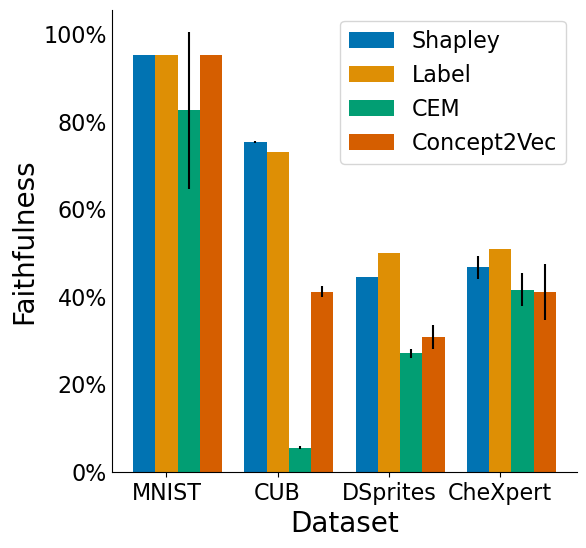

In [24]:
cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Faithfulness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = means[i]
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_faithfulness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


In [25]:
datasets = ['mnist','cub','dsprites','chexpert']
methods = ['shapley','label','cem','concept2vec']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}_{}.txt".format(d,m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Robustness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))
truth_data

{'mnist': [(0.04761904761904767, 0.0),
  (0.04761904761904767, 0.0),
  (0.28571428571428575, 0.10286889997472791),
  (0.04761904761904767, 0.0)],
 'cub': [(0.38591269841269843, 0.040975945293776544),
  (0.0267857142857143, 0.0),
  (0.9751984126984127, 0.01148396518133952),
  (0.6865079365079364, 0.018559808466140564)],
 'dsprites': [(0.38888888888888884, 0.01512030705421717),
  (0.8148148148148149, 0.0),
  (0.7592592592592592, 0.15930231976004866),
  (0.8765432098765432, 0.04364856673991033)],
 'chexpert': [(0.6324786324786325, 0.03197997766473456),
  (0.07692307692307687, 0.0),
  (0.5042735042735043, 0.11530544925839355),
  (0.358974358974359, 0.07548513560963974)]}

In [26]:
datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['Shapley','Label','CEM','Concept2Vec']

[0.9523809523809523, 0.6140873015873016, 0.6111111111111112, 0.36752136752136755] [0.         0.04097595 0.01512031 0.03197998] [0 1 2 3]
[0.9523809523809523, 0.9732142857142857, 0.18518518518518512, 0.9230769230769231] [0. 0. 0. 0.] [0 1 2 3]
[0.7142857142857142, 0.024801587301587324, 0.2407407407407408, 0.49572649572649574] [0.1028689  0.01148397 0.15930232 0.11530545] [0 1 2 3]
[0.9523809523809523, 0.3134920634920636, 0.12345679012345678, 0.641025641025641] [0.         0.01855981 0.04364857 0.07548514] [0 1 2 3]


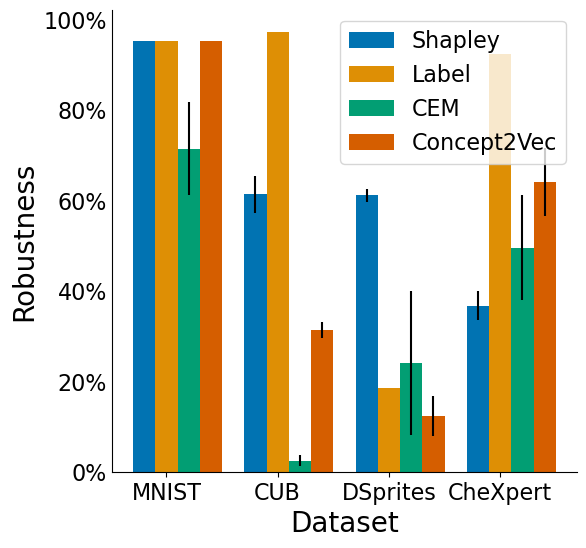

In [27]:
cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Robustness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [1-j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_robustness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


# Intervention Experiments

In [28]:
results_baseline = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("baseline"),"rb"))
results_shapley = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("shapley"),"rb"))
results_labels = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("label"),"rb"))
results_random = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("random"),"rb"))
results_concept2vec = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("concept2vec"),"rb"))
results_tcav = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("tcav"),"rb"))
results_cem = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("cem"),"rb"))
results_baseline_cub_1 = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("cem"),"rb"))
results_baseline_cub_2 = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("cem"),"rb"))
results_shapley_indices = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("shapley_indices"),"rb"))
results_shapley_limit = pickle.load(open("../../cem/cem/results/intervention/{}.pkl".format("shapley_limit"),"rb"))

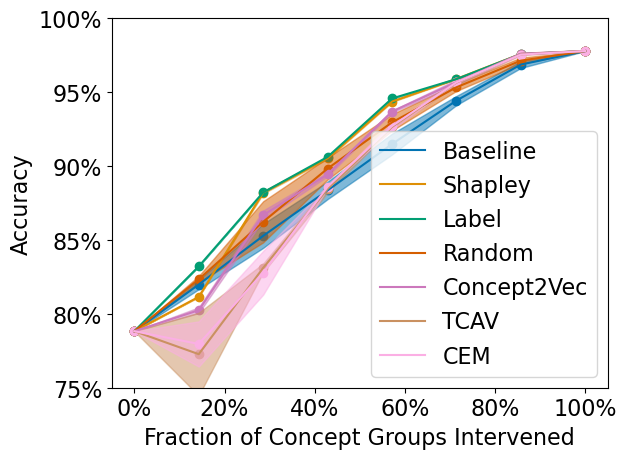

In [30]:
results_main = [results_baseline,results_shapley,results_labels,results_random,results_concept2vec,results_tcav,results_cem]
results_main_names = ['Baseline','Shapley','Label','Random','Concept2Vec','TCAV','CEM']

clrs = sns.color_palette("colorblind", 10)

for i,result in enumerate(results_main):
    name = results_main_names[i]
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=16)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=16)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=16)
    plt.ylabel("Accuracy",fontsize=16)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend(fontsize=16)
plt.savefig("figures/intervention_all.pdf",dpi=300,bbox_inches="tight")

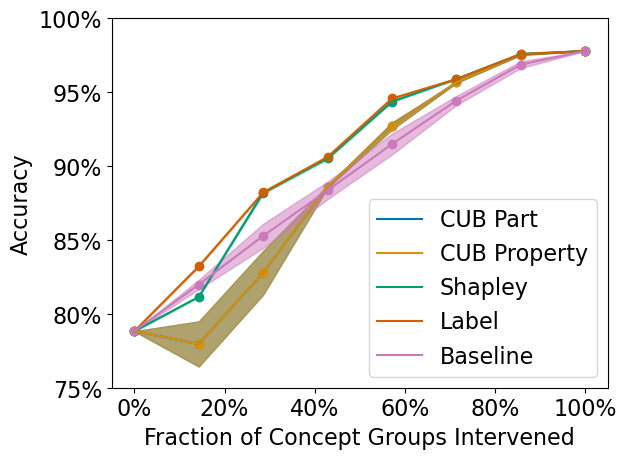

In [31]:
results_main = [results_baseline_cub_1,results_baseline_cub_2,results_shapley,results_labels,results_baseline]
results_main_names = ['CUB Part','CUB Property','Shapley','Label','Baseline']

clrs = sns.color_palette("colorblind", 10)

for i,result in enumerate(results_main):
    name = results_main_names[i]
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=16)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=16)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=16)
    plt.ylabel("Accuracy",fontsize=16)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend(fontsize=16)
plt.savefig("figures/intervention_groundtruth.pdf",dpi=300,bbox_inches="tight")

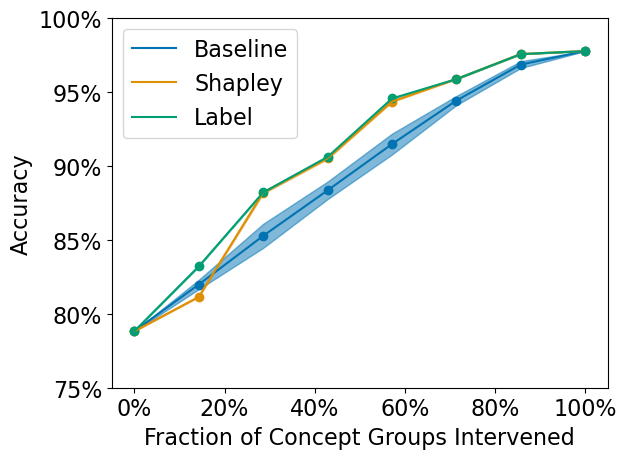

In [32]:
results_main = [results_baseline,results_shapley,results_labels]
results_main_names = ['Baseline','Shapley','Label']

clrs = sns.color_palette("colorblind", 10)

for i,result in enumerate(results_main):
    name = results_main_names[i]
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=16)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=16)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=16)
    plt.ylabel("Accuracy",fontsize=16)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend(fontsize=16)
plt.savefig("figures/intervention_shapley.pdf",dpi=300,bbox_inches="tight")

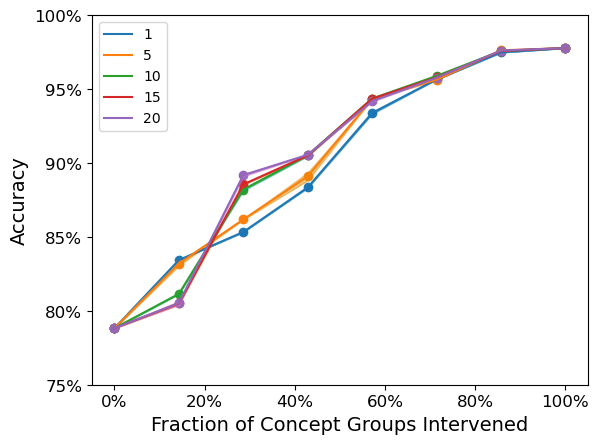

In [10]:
clrs = sns.color_palette("colorblind", 10)

for i,num in enumerate(results_shapley_indices):
    name = str(num)
    result = results_shapley_indices[num] 
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=14)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=12)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=12)
    plt.ylabel("Accuracy",fontsize=14)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend()
plt.savefig("figures/shapley_index.pdf",dpi=300,bbox_inches="tight")

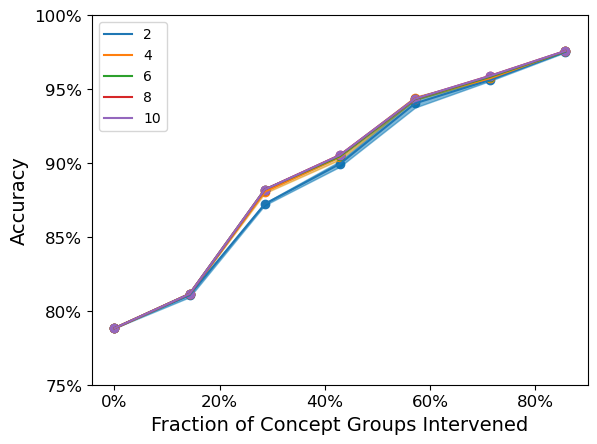

In [11]:
clrs = sns.color_palette("colorblind", 10)

for i,num in enumerate(results_shapley_limit):
    name = str(num)
    result = results_shapley_limit[num] 
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=14)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=12)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=12)
    plt.ylabel("Accuracy",fontsize=14)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend()
plt.savefig("figures/shapley_limit.pdf",dpi=300,bbox_inches="tight")

In [ ]:
results_main = [results_baseline,results_shapley,results_labels,results_random,results_concept2vec,results_tcav,results_cem]
results_main_names = ['Baseline','Shapley','Label','Random','Concept2Vec','TCAV','CEM']

clrs = sns.color_palette("colorblind", 10)

for i,result in enumerate(results_main):
    name = results_main_names[i]
    
    color = clrs[i]
    x_vals = sorted(result.keys())
    x_vals = [i/28 for i in x_vals]
    all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
    y_vals = np.array([np.mean(j) for j in all_y_vals])
    y_stds = np.array([np.std(j) for j in all_y_vals])
    plt.ylim([.75,1])
    plt.plot(x_vals,y_vals,label=name)
    plt.xlabel("Fraction of Concept Groups Intervened",fontsize=14)
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=12)
    plt.yticks([0.75,0.8,0.85,0.9,0.95,1.0],["75%","80%","85%","90%","95%","100%"],fontsize=12)
    plt.ylabel("Accuracy",fontsize=14)
    plt.scatter(x_vals,y_vals)
    plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

plt.legend()
plt.savefig("figures/intervention_all.pdf",dpi=300,bbox_inches="tight")

## CBM + Hierarchy

## Ablation

### Evaluation Hyperparameters

In [14]:
f = open("results/evaluation/cub_truthfulness_ablation.txt").read().strip().split("\n")
truth_ablation = {}

for i in f:
    a,b = i.split(": ")
    b = eval(b)
    
    truth_ablation[int(a)] = {
        'truthfulness': b[0], 
        'std': b[1]
    }

print(truth_ablation)

{1: {'truthfulness': 0.625, 'std': 0.0072901480439975285}, 3: {'truthfulness': 0.7331349206349205, 'std': 0.0014029896452113987}, 5: {'truthfulness': 0.755952380952381, 'std': 0.0022271770159368225}, 7: {'truthfulness': 0.7414965986394556, 'std': 0.0024051251060767213}}


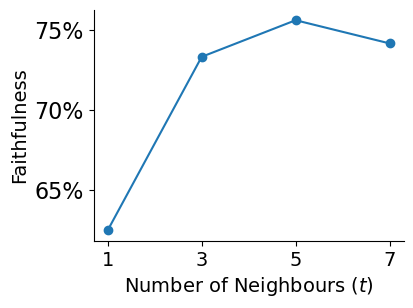

In [16]:
plt.figure(figsize=(4,3))
keys = sorted(truth_ablation.keys())
values = [truth_ablation[i]['truthfulness'] for i in keys]
plt.scatter(keys,values)
plt.plot(keys,values)
plt.xlabel('Number of Neighbours ($t$)',fontsize=14)
plt.ylabel('Faithfulness',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([1,3,5,7])
plt.yticks([0.65,0.7,0.75])
plt.yticks(plt.gca().get_yticks(),fontsize=16, labels=['{:.0%}'.format(x) for x in plt.gca().get_yticks()])

plt.savefig('figures/metric_ablation.pdf', dpi=300, bbox_inches='tight')    

### Noise Definition

In [45]:
f = open("results/evaluation/cub_noise_ablation.txt").read()
print(f)
# Values are evalautions of the image robustness

flip_prob_0.01: (0.0, 0.0)
flip_prob_0.05: (0.0, 0.0)
flip_prob_0.1: (0.0, 0.0)
noise_0.1: (0.5386904761904762, 0.0)



### Compare Models

In [47]:
f = open("results/evaluation/cub_model_comparison.txt").read()
print(f)
# Distances between models; lower is closer

resnet50: (0.7519841269841269, 0.10212955167961259)
inceptionv3: (0.01091269841269841, 0.015432886097325441)



In [48]:
dataset = CUB_Dataset()
attributes = dataset.get_attributes()

In [61]:
def get_shapley_model(model_name):
    def get_vectors(attribute,dataset,suffix,seed=-1):
        return np.load(open("results/shapley/{}_model_{}/{}/{}.npy".format(dataset.experiment_name+suffix,model_name,seed,attribute),"rb"),allow_pickle=True)

    return get_vectors

In [63]:
cub_hierarchy_vgg16 = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_vgg16)

                          ---- has_upper_tail_color::buff
                     ----|
                          ---- has_under_tail_color::buff

                ----|
                               ---- has_upperparts_color::buff
                          ----|
                                    ---- has_wing_color::buff
                               ----|
                                    ---- has_back_color::buff


                     ----|
                               ---- has_nape_color::buff
                          ----|
                               ---- has_primary_color::buff



           ----|
                     ---- has_throat_color::buff
                ----|
                          ---- has_breast_color::buff
                     ----|
                               ---- has_underparts_color::buff
                          ----|
                               ---- has_belly_color::buff




      ----|
                     ---- has_belly_color::brown
          

In [64]:
cub_hierarchy_resnet50 = create_hierarchy(create_ward_hierarchy,get_shapley_model("resnet50"),dataset,'',attributes,43)
print(cub_hierarchy_resnet50)

                ---- has_size::medium_(9_-_16_in)
           ----|
                ---- has_shape::duck-like

      ----|
                          ---- has_bill_shape::dagger
                     ----|
                          ---- has_crown_color::white

                ----|
                          ---- has_bill_length::about_the_same_as_head
                     ----|
                          ---- has_primary_color::black


           ----|
                          ---- has_nape_color::white
                     ----|
                               ---- has_upperparts_color::white
                          ----|
                               ---- has_back_color::white


                ----|
                               ---- has_bill_shape::hooked_seabird
                          ----|
                               ---- has_under_tail_color::white

                     ----|
                               ---- has_upper_tail_color::white
                          ----|
  

In [65]:
cub_hierarchy_inceptionv3 = create_hierarchy(create_ward_hierarchy,get_shapley_model("inceptionv3"),dataset,'',attributes,43)
print(cub_hierarchy_inceptionv3)

                          ---- has_upper_tail_color::buff
                     ----|
                          ---- has_under_tail_color::buff

                ----|
                               ---- has_upperparts_color::buff
                          ----|
                                    ---- has_wing_color::buff
                               ----|
                                    ---- has_back_color::buff


                     ----|
                               ---- has_nape_color::buff
                          ----|
                               ---- has_primary_color::buff



           ----|
                     ---- has_throat_color::buff
                ----|
                          ---- has_breast_color::buff
                     ----|
                               ---- has_underparts_color::buff
                          ----|
                               ---- has_belly_color::buff




      ----|
                     ---- has_belly_color::brown
          

### CBM + Hierarchy Ablation

In [4]:
with open('results/knn/wandb_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    headers = next(csv_reader)
    
    data = []
    
    for row in csv_reader:
        row_dict = {}
        for i in range(len(headers)):
            row_dict[headers[i]] = row[i]
        
        data.append(row_dict)


In [5]:
for d in data:
    if 'fixed' in d['Name']:
        d['fixed'] = True
    else:
        d['fixed'] = False
    d['pretrain'] = bool(d['pretrain'])
    d['seed'] = int(d['seed'])
    d['test_acc'] = float(d['test_acc'])

In [6]:
data[0]

{'Name': 'dsprites mlp fixed 45',
 'State': 'finished',
 'Notes': '-',
 'User': 'navr414',
 'Tags': '',
 'Created': '2023-04-30T13:14:56.000Z',
 'Runtime': '88',
 'Sweep': '',
 'architecture': 'mlp',
 'dataset': 'dsprites',
 'epochs': '10',
 'learning_rate': '0.005',
 'num_clauses': '',
 'pretrain': True,
 'hierarchy_name': 'shapley',
 'seed': 45,
 'epoch': '9',
 'train_acc': '0.3984000086784363',
 'train_loss': '1.5188103914260864',
 'trainer/global_step': '789',
 'val_acc': '0.390666663646698',
 'val_loss': '1.5175566673278809',
 'loss': '1.9835715293884275',
 'test_acc': 0.4000000059604645,
 'test_auc': '',
 'fixed': True}

#### CUB

MLP: 0.6796666666666668 0.0016996731711975965
MLP Fixed: 0.6813333333333333 0.0018856180831641283


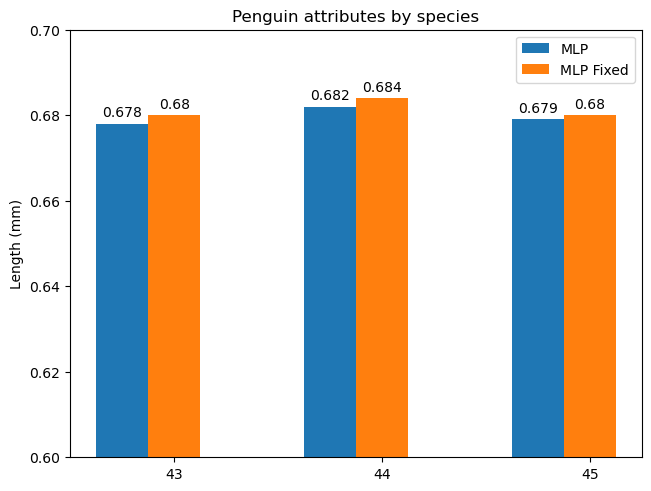

In [12]:
seeds = [43, 44, 45]
fixed_false_acc = []
fixed_true_acc = []
dataset_name = 'cub'

for d in sorted(data,key=lambda k: k['seed']):
    if int(d['seed']) in seeds and d['dataset'] == dataset_name:
        if d['architecture'] == 'mlp' and d['fixed'] == False:
            fixed_false_acc.append(float(d['test_acc']))
        elif d['architecture'] == 'mlp' and d['fixed'] == True:
            fixed_true_acc.append(float(d['test_acc']))

fixed_false_acc = [round(i,3) for i in fixed_false_acc]
fixed_true_acc = [round(i,3) for i in fixed_true_acc]
            
test_acc = {
    'MLP': fixed_false_acc,
    'MLP Fixed': fixed_true_acc,
}

x = np.arange(len(seeds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

print('MLP: {} {}'.format(np.mean(fixed_false_acc),np.std(fixed_false_acc)))
print('MLP Fixed: {} {}'.format(np.mean(fixed_true_acc),np.std(fixed_true_acc)))

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, [str(i) for i in seeds])
plt.legend()
ax.set_ylim(0.6,0.7)

plt.show()


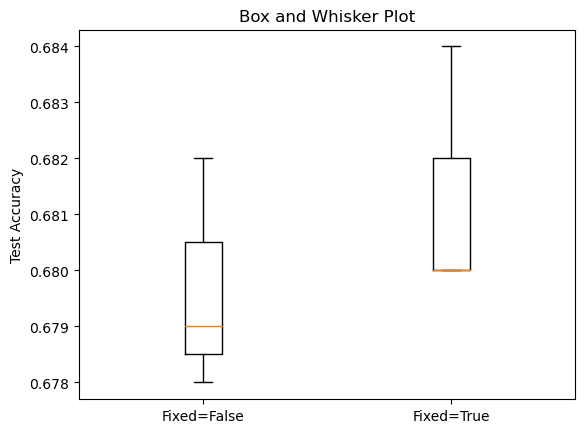

In [13]:
box_whisker_data = [fixed_false_acc, fixed_true_acc]

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title('Box and Whisker Plot')

# Create the box and whisker plot
ax.boxplot(box_whisker_data)

# Set the x-tick labels
ax.set_xticklabels(['Fixed=False', 'Fixed=True'])

# Set the y-axis label
ax.set_ylabel('Test Accuracy')

# Show the plot
plt.show()


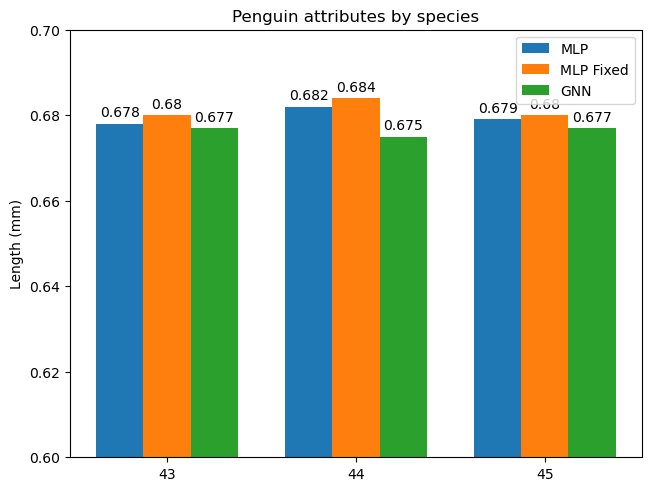

In [14]:
seeds = [43, 44, 45]
fixed_false_acc = []
fixed_true_acc = []
fixed_gnn_simple = []
dataset_name = 'cub'

for d in sorted(data,key=lambda k: k['seed']):
    if int(d['seed']) in seeds and d['dataset'] == dataset_name:
        if d['architecture'] == 'mlp' and d['fixed'] == False:
            fixed_false_acc.append(float(d['test_acc']))
        elif d['architecture'] == 'mlp' and d['fixed'] == True:
            fixed_true_acc.append(float(d['test_acc']))
        elif d['architecture'] == 'gnn_basic' and d['hierarchy_name'] == 'shapley':
            fixed_gnn_simple.append(float(d['test_acc']))

fixed_false_acc = [round(i,3) for i in fixed_false_acc]
fixed_true_acc = [round(i,3) for i in fixed_true_acc]
fixed_gnn_simple = [round(i,3) for i in fixed_gnn_simple]
            
test_acc = {
    'MLP': fixed_false_acc,
    'MLP Fixed': fixed_true_acc,
    'GNN': fixed_gnn_simple
}

x = np.arange(len(seeds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0



fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, [str(i) for i in seeds])
plt.legend()
ax.set_ylim(0.6,0.7)

plt.show()


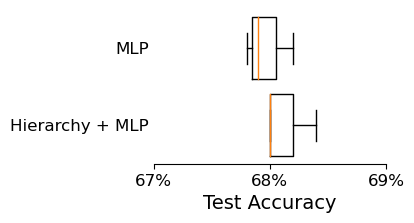

In [15]:
box_whisker_data = [fixed_true_acc, fixed_false_acc]

with plt.style.context("tableau-colorblind10"):

    def percentage(x, pos):
        return '{:.0%}'.format(x)

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(3,2))

    # Create the box and whisker plot horizontally
    ax.boxplot(box_whisker_data, vert=False,widths=0.8)

    # Set the y-tick labels
    ax.set_yticklabels(['Hierarchy + MLP', 'MLP'])

    formatter = FuncFormatter(percentage)
    ax.xaxis.set_major_formatter(formatter)

    # Set the x-axis label
    ax.set_xlabel('Test Accuracy',fontsize=14)
    plt.xlim([0.67,0.69])
    plt.xticks([0.67,0.68,0.69],fontsize=12)
    plt.yticks(fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length=0)

    plt.savefig('scripts/Figures/box_plot_cbm.pdf', dpi=300, bbox_inches='tight')    
    # Show the plot
    plt.show()


#### DSprites

MLP: 0.20000000000000004 2.7755575615628914e-17
MLP Fixed: 0.4053333333333334 0.012814921857827377


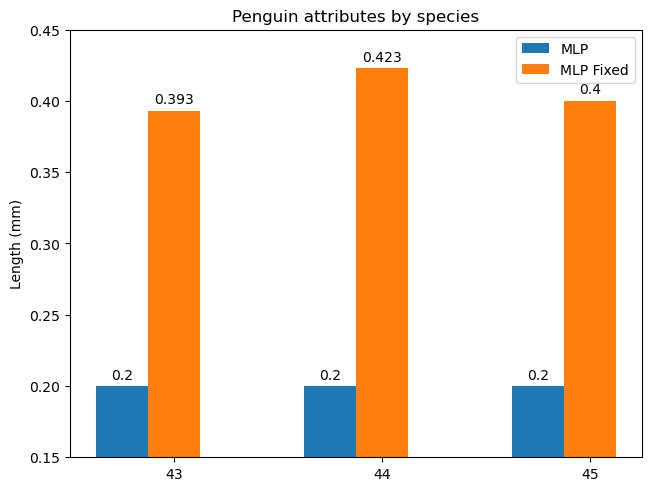

In [9]:
seeds = [43, 44, 45]
fixed_false_acc = []
fixed_true_acc = []
dataset_name = 'dsprites'

for d in sorted(data,key=lambda k: k['seed']):
    if int(d['seed']) in seeds and d['dataset'] == dataset_name:
        if d['architecture'] == 'mlp' and d['fixed'] == False:
            fixed_false_acc.append(float(d['test_acc']))
        elif d['architecture'] == 'mlp' and d['fixed'] == True:
            fixed_true_acc.append(float(d['test_acc']))

fixed_false_acc = [round(i,3) for i in fixed_false_acc]
fixed_true_acc = [round(i,3) for i in fixed_true_acc]
            
test_acc = {
    'MLP': fixed_false_acc,
    'MLP Fixed': fixed_true_acc,
}

print('MLP: {} {}'.format(np.mean(fixed_false_acc),np.std(fixed_false_acc)))
print('MLP Fixed: {} {}'.format(np.mean(fixed_true_acc),np.std(fixed_true_acc)))

x = np.arange(len(seeds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0



fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, [str(i) for i in seeds])
plt.legend()
ax.set_ylim(0.15,0.45)

plt.show()


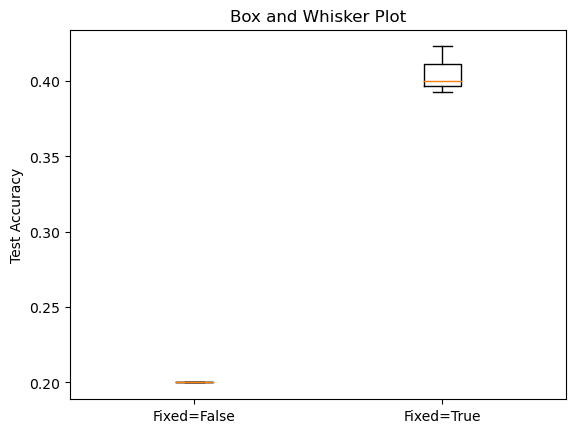

In [18]:
box_whisker_data = [fixed_false_acc, fixed_true_acc]

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title('Box and Whisker Plot')

# Create the box and whisker plot
ax.boxplot(box_whisker_data)

# Set the x-tick labels
ax.set_xticklabels(['Fixed=False', 'Fixed=True'])

# Set the y-axis label
ax.set_ylabel('Test Accuracy')

# Show the plot
plt.show()

#### Chexpert

MLP: 0.8413333333333334 0.0023570226039551605
MLP Fixed: 0.8393333333333333 0.0009428090415820641


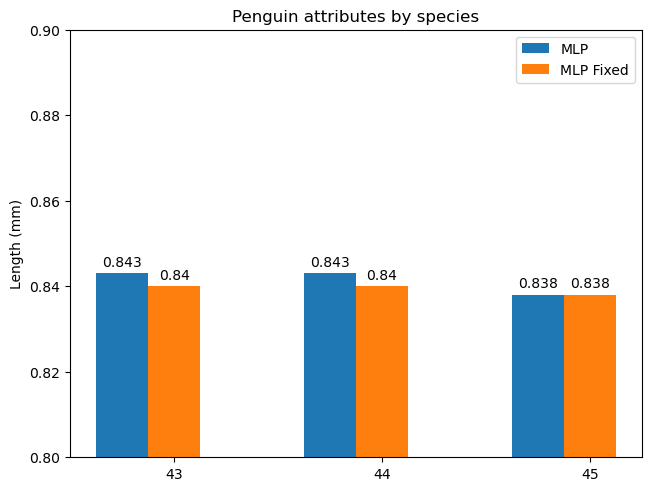

In [10]:
seeds = [43, 44, 45]
fixed_false_acc = []
fixed_true_acc = []
dataset_name = 'chexpert'

for d in sorted(data,key=lambda k: k['seed']):
    if int(d['seed']) in seeds and d['dataset'] == dataset_name:
        if d['architecture'] == 'mlp' and d['fixed'] == False:
            fixed_false_acc.append(float(d['test_acc']))
        elif d['architecture'] == 'mlp' and d['fixed'] == True:
            fixed_true_acc.append(float(d['test_acc']))

fixed_false_acc = [round(i,3) for i in fixed_false_acc]
fixed_true_acc = [round(i,3) for i in fixed_true_acc]
            
test_acc = {
    'MLP': fixed_false_acc,
    'MLP Fixed': fixed_true_acc,
}

x = np.arange(len(seeds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

print('MLP: {} {}'.format(np.mean(fixed_false_acc),np.std(fixed_false_acc)))
print('MLP Fixed: {} {}'.format(np.mean(fixed_true_acc),np.std(fixed_true_acc)))

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, [str(i) for i in seeds])
plt.legend()
ax.set_ylim(0.8,0.9)

plt.show()


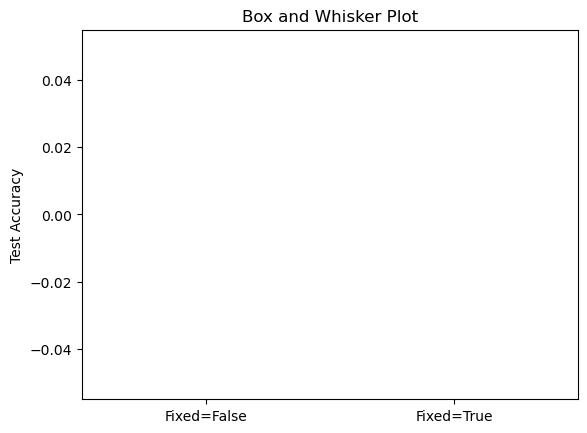

In [9]:
box_whisker_data = [fixed_false_acc, fixed_true_acc]

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title('Box and Whisker Plot')

# Create the box and whisker plot
ax.boxplot(box_whisker_data)

# Set the x-tick labels
ax.set_xticklabels(['Fixed=False', 'Fixed=True'])

# Set the y-axis label
ax.set_ylabel('Test Accuracy')

# Show the plot
plt.show()

## KNN + Hierarchy

In [4]:
datasets = ['cub','chexpert','dsprites']

In [5]:
for d in datasets:
    print("== {} ==".format(d))
    print(open("results/knn/{}.txt".format(d)).read())

== cub ==
logit_acc: (0.9770995919218396, 0.9445504412115431, 0.9468030351595247)
fix_acc: (0.9802420916239724, 0.9468608394943954, 0.9488171260910301)
logit_knn: 0.6731101139109423
round_knn: 0.6280635139799793
predict_knn: 0.6441146013117017
prob_1: 0.6751812219537453
prob_2: 0.6758715913013462
concept_prob: 0.6772523299965482
trimmed: 0.6330686917500863
baseline: 0.6731101139109423, 0.6731101139109423, 0.6731101139109423
concept: 0.676389368312047, 0.6794960303762513, 0.6753538142906454
idx: ???
y_image: 19
baseline_image: 199
concept_image: 19
baseline_images: 3991, 2121, 1246,  503, 2427
concept_images: 4445,  503, 3991, 2121, 2916

== chexpert ==
logit_acc: (0.8890192307692307, 0.8614615384615385, 0.8651538461538462)
fix_acc: (0.8900384615384616, 0.8637692307692307, 0.8647692307692307)
logit_knn: 0.837
round_knn: 0.688
predict_knn: 0.69
prob_1: 0.835
prob_2: 0.839
concept_prob: 0.841
trimmed: 0.668
baseline: 0.837, 0.837, 0.837
concept: 0.828, 0.838, 0.841
idx: 806
y_image: 0
bas

## Extra Evaluation

### Comparing different Hierarchies

In [12]:
hierarchy_by_metric = json.load(open("results/extra_evaluation/distance_cosine_euclidean_top_k.json"))

In [11]:
metric_distances = json.load(open('results/extra_evaluation/metric_distances.json','r'))

In [21]:
metric_distances

{'label': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.35714285714285704, 5.551115123125783e-17],
   'manhattan': [0.0, 0.0]},
  'cosine': {'euclidean': [0.35714285714285704, 5.551115123125783e-17],
   'cosine': [0.0, 0.0],
   'manhattan': [0.35714285714285704, 5.551115123125783e-17]},
  'manhattan': {'euclidean': [0.0, 0.0],
   'cosine': [0.35714285714285704, 5.551115123125783e-17],
   'manhattan': [0.0, 0.0]}},
 'shapley': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.2232142857142857, 0.002430049347999176],
   'manhattan': [0.38988095238095233, 0.0]},
  'cosine': {'euclidean': [0.2232142857142857, 0.002430049347999176],
   'cosine': [0.0, 0.0],
   'manhattan': [0.3015873015873016, 0.0028059792904227975]},
  'manhattan': {'euclidean': [0.38988095238095233, 0.0],
   'cosine': [0.3015873015873016, 0.0028059792904227975],
   'manhattan': [0.0, 0.0]}},
 'cem': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.4662698412698412, 0.1045297903581099],
   'manhattan

In [10]:
metric_to_nice = {
    'euclidean': 'Euclidean', 
    'cosine': 'Cosine',
    'manhattan': 'Manhattan'
}

method_to_nice = {
    'cem': 'CEM',
    'concept2vec':'Concept2Vec',
    'label': 'Label',
    'shapley': 'Shapley',
}

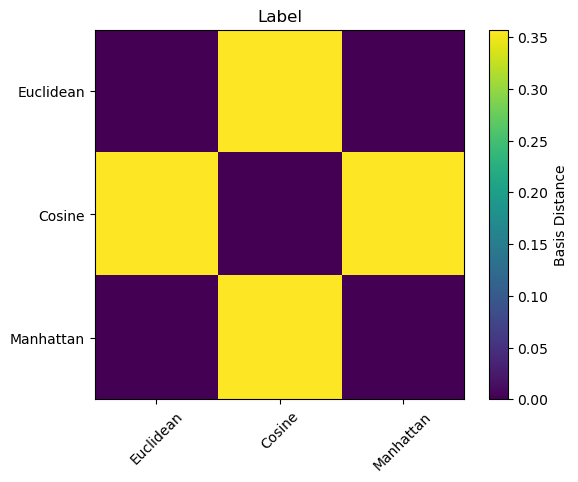

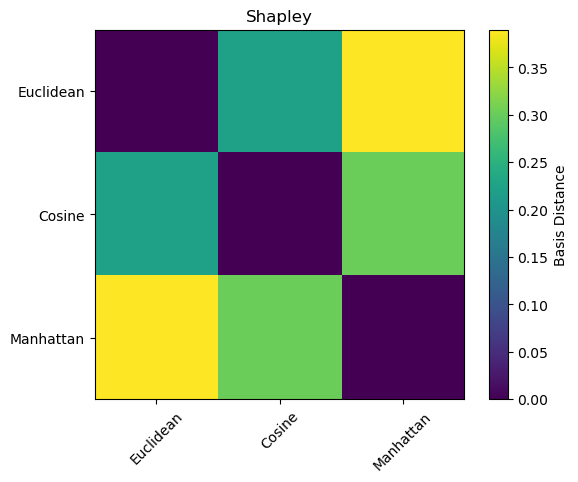

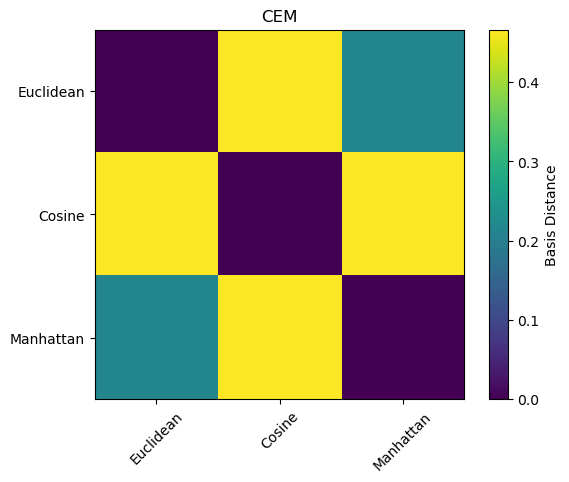

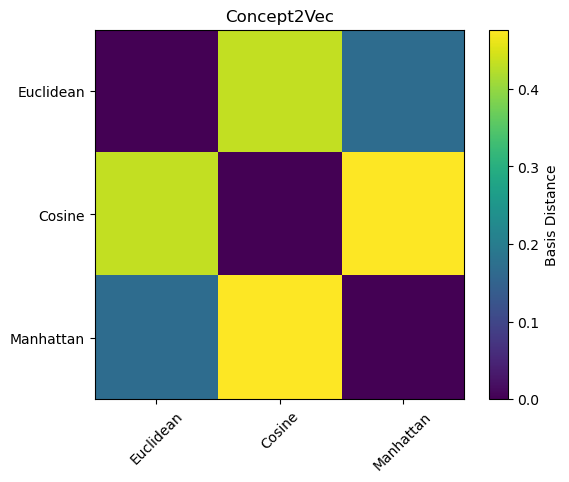

<Figure size 640x480 with 0 Axes>

In [13]:
for method in metric_distances:
    plt.title(method_to_nice[method])
    labels = ['euclidean','cosine','manhattan']

    metric_distances_method = np.array([[metric_distances[method][i][j][0] for j in labels] for i in labels])

    plt.imshow(metric_distances_method, cmap='viridis', interpolation='nearest')

    # Add labels and ticks
    plt.xticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels], rotation=45)
    plt.yticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels])
    colorbar = plt.colorbar()
    colorbar.set_label('Basis Distance')

    plt.savefig("figures/metric_distance_{}.pdf".format(method), dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


    plt.figure() 

In [5]:
distance_by_hierarchy_cub = json.load(open('results/extra_evaluation/distance_between_hierarchies.json','r'))

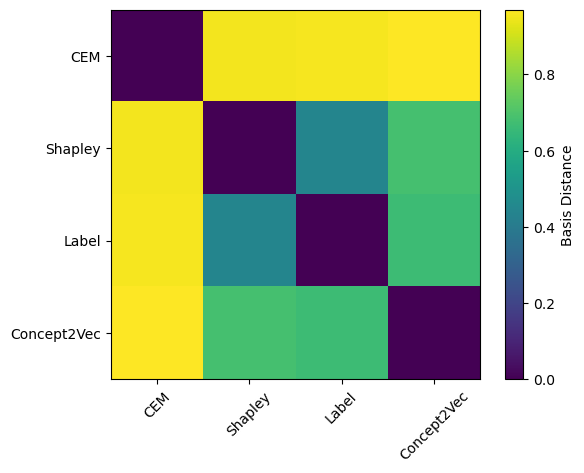

In [9]:
labels = ['cem','shapley','label','concept2vec']

plt.imshow(distance_by_hierarchy_cub, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels)), [method_to_nice[i] for i in labels], rotation=45)
plt.yticks(np.arange(len(labels)), [method_to_nice[i] for i in labels])
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/hierarchy_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Comparison With Ground Truth

In [4]:
mnist_distances = json.load(open('results/extra_evaluation/distance_mnist.json','r'))
cub_distances_part_1 = json.load(open('results/extra_evaluation/distance_cub_first_part.json','r'))
cub_distances_part_2 = json.load(open('results/extra_evaluation/distance_cub_second_part.json','r'))

In [5]:
mnist_distances

{'label': [0.04761904761904767, 0.0],
 'shapley': [0.04761904761904767, 0.0],
 'cem': [0.126984126984127, 0.1472002935792969],
 'concept2vec': [0.04761904761904767, 0.0]}

In [6]:
cub_distances_part_1

{'label': [0.9970238095238096, 1.1102230246251565e-16],
 'shapley': [0.9970238095238096, 1.1102230246251565e-16],
 'cem': [0.9692460317460317, 0.009200018348706021],
 'concept2vec': [0.9920634920634921, 0.002805979290422798]}

In [7]:
cub_distances_part_2

{'label': [0.8065476190476191, 0.0],
 'shapley': [0.7916666666666666, 0.0],
 'cem': [0.9593253968253969, 0.00505855110475478],
 'concept2vec': [0.8273809523809524, 0.01928791874526147]}

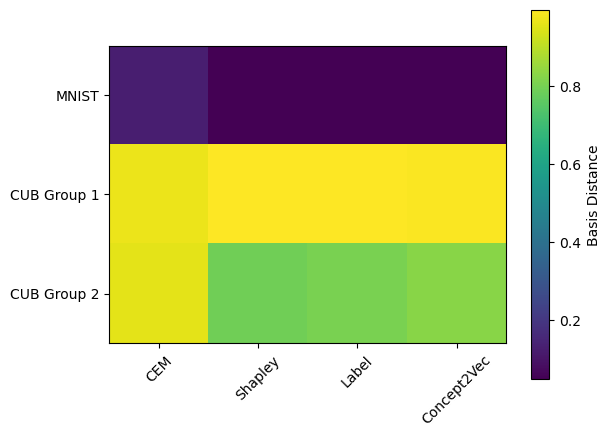

In [11]:
labels_x = ['cem','shapley','label','concept2vec']
labels_y = ['MNIST','CUB Group 1', 'CUB Group 2'] 

distances_as_matrix = [
    [j[i][0] for j in [mnist_distances,cub_distances_part_1,cub_distances_part_2]] for i in labels_x
]

plt.imshow(np.array(distances_as_matrix).T, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels_x)), [method_to_nice[i] for i in labels_x], rotation=45)
plt.yticks(np.arange(len(labels_y)), labels_y)
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/heuristic_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Comparing to Zhang-Sha Sha

In [10]:
zhang_distances = json.load(open('results/extra_evaluation/similarity_to_zhang.json','r'))

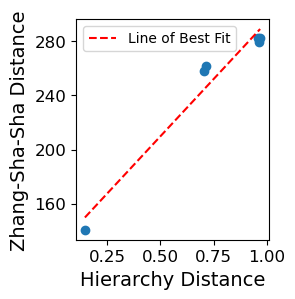

In [50]:
x_data = [i[0] for i in zhang_distances['cosine']]
y_data = [i[1] for i in zhang_distances['cosine']]

# Fit a polynomial regression line
degree = 1  # Linear regression
coefficients = np.polyfit(x_data, y_data, degree)

# Create a polynomial function from the coefficients
poly_function = np.poly1d(coefficients)

# Generate a range of x values for the line of best fit
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values using the polynomial function
y_fit = poly_function(x_fit)

# Create the scatter plot
plt.figure(figsize=(3, 3))
plt.xlabel("Hierarchy Distance", fontsize=14)
plt.ylabel("Zhang-Sha-Sha Distance", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([160, 200, 240, 280], fontsize=12)

# Add the scatter points
plt.scatter(x_data, y_data)

# Add the line of best fit
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Line of Best Fit')

plt.legend()  # Add a legend to the plot

plt.tight_layout()

plt.savefig("figures/zhang_cosine.pdf", dpi=300, bbox_inches='tight')
plt.show()


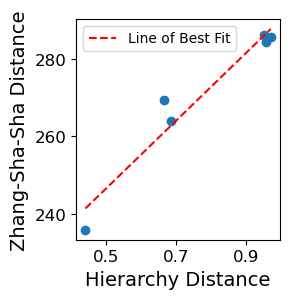

In [52]:
x_data = [i[0] for i in zhang_distances['euclidean']]
y_data = [i[1] for i in zhang_distances['euclidean']]

# Fit a polynomial regression line
degree = 1  # Linear regression
coefficients = np.polyfit(x_data, y_data, degree)

# Create a polynomial function from the coefficients
poly_function = np.poly1d(coefficients)

# Generate a range of x values for the line of best fit
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values using the polynomial function
y_fit = poly_function(x_fit)

# Create the scatter plot
plt.figure(figsize=(3, 3))
plt.xlabel("Hierarchy Distance", fontsize=14)
plt.ylabel("Zhang-Sha-Sha Distance", fontsize=14)
plt.xticks([0.5,0.7,0.9],fontsize=12)
plt.yticks([240,260,280], fontsize=12)

# Add the scatter points
plt.scatter(x_data, y_data)

# Add the line of best fit
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Line of Best Fit')

plt.legend()  # Add a legend to the plot

plt.tight_layout()
plt.savefig("figures/zhang_euclidean.pdf", dpi=300, bbox_inches='tight')
plt.show()
